<a href="https://colab.research.google.com/github/varshinisomineni/TASK-2/blob/main/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files
import io

# Upload dataset
print("📤 Please upload Titanic-Dataset.csv")
uploaded = files.upload()

# Read uploaded file dynamically
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print(f"✅ Dataset '{filename}' loaded successfully!")
print("Shape:", df.shape)
df.head()


📤 Please upload Titanic-Dataset.csv


Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv
✅ Dataset 'Titanic-Dataset (1).csv' loaded successfully!
Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Basic summary
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Check missing values
print("\nMissing values:\n", df.isnull().sum())

# Data types
print("\nData types:\n", df.dtypes)



Summary Statistics:
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   71

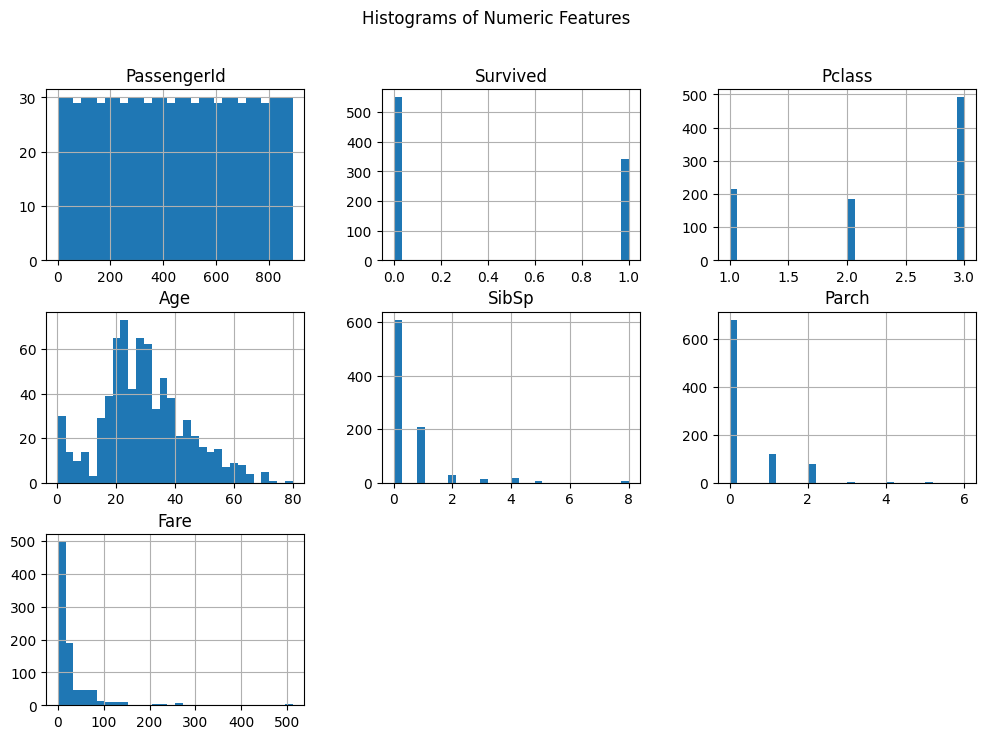

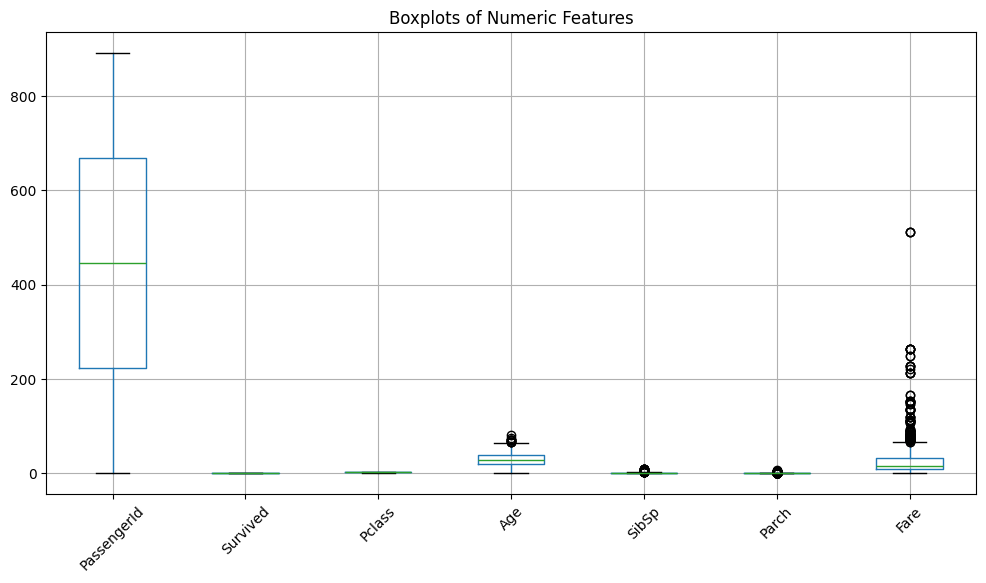

In [9]:
# Histograms for numeric features
df.hist(bins=30, figsize=(12,8))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# Boxplots for numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12,6))
df[numeric_cols].boxplot()
plt.title("Boxplots of Numeric Features")
plt.xticks(rotation=45)
plt.show()


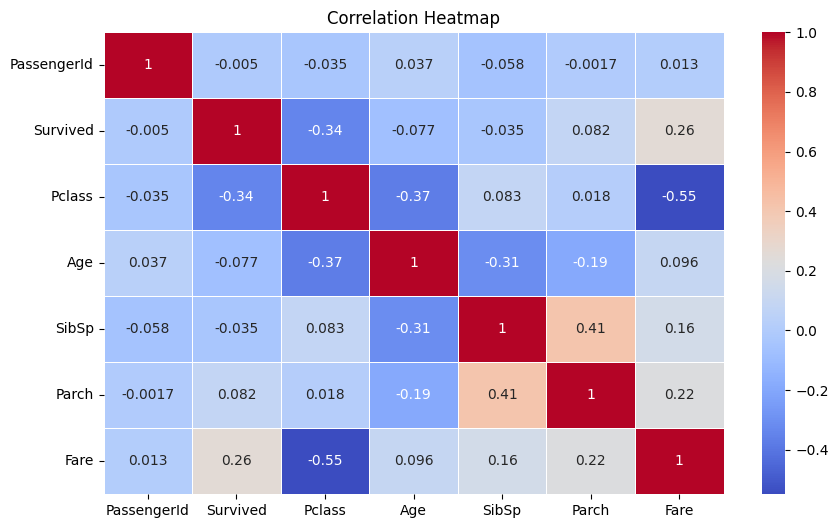

In [10]:
# Correlation matrix
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


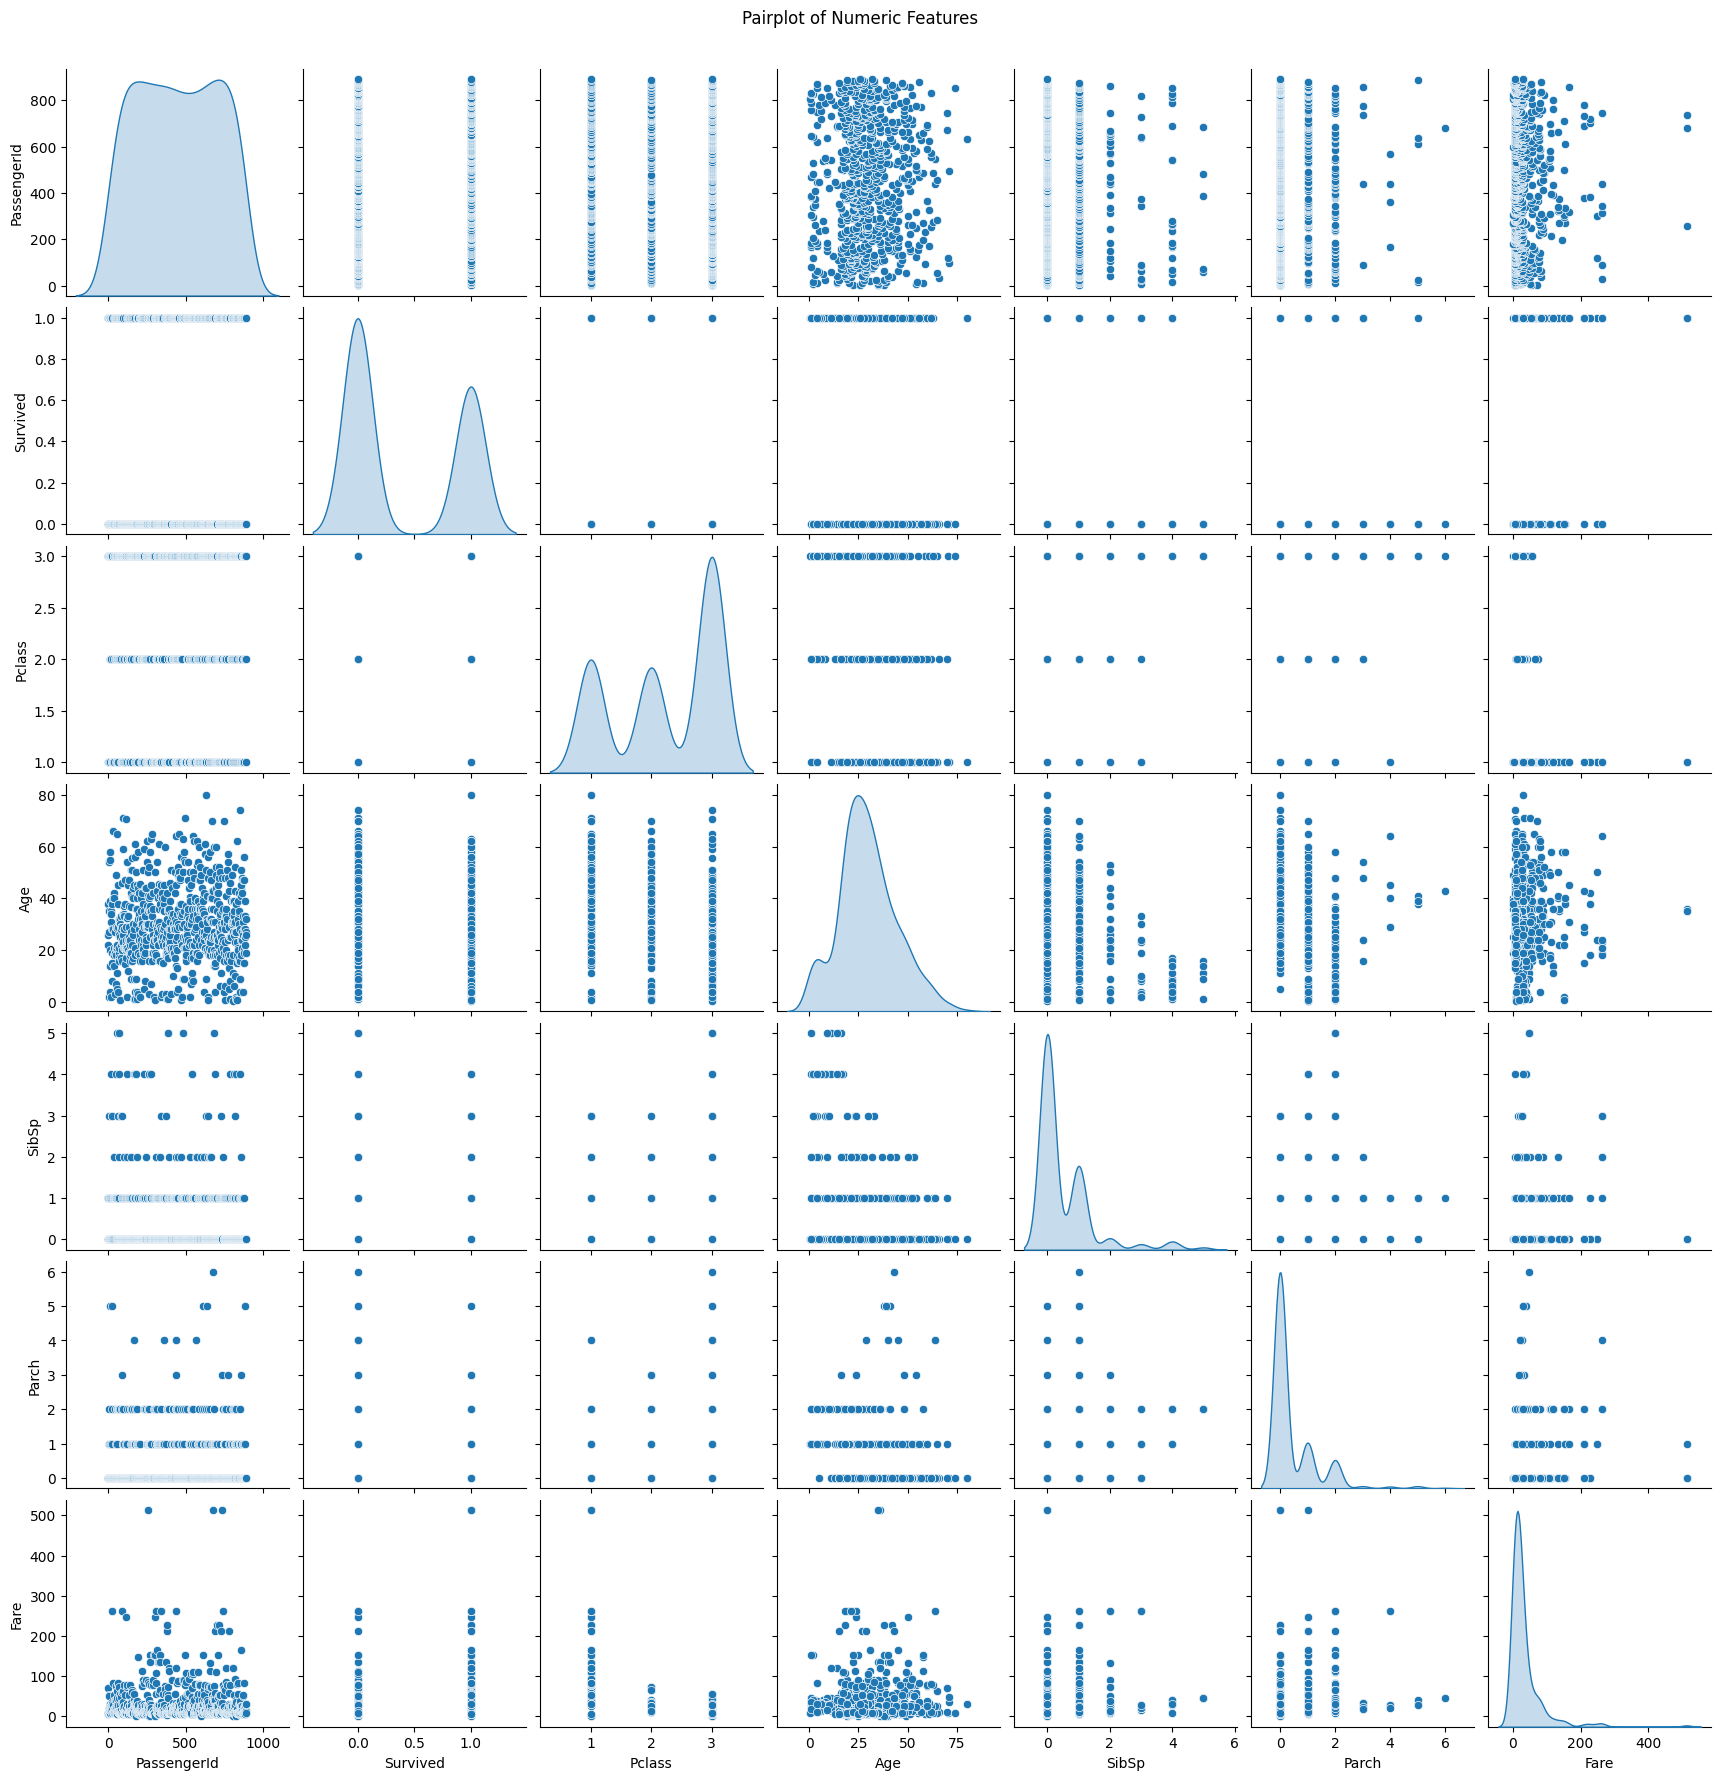

In [11]:
sns.pairplot(df.select_dtypes(include=[np.number]).dropna(), diag_kind='kde')
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()


In [12]:
# Example: Survival by Age & Sex
if 'Survived' in df.columns and 'Age' in df.columns and 'Sex' in df.columns:
    fig = px.histogram(df, x="Age", color="Sex", barmode="overlay", facet_col="Survived")
    fig.update_layout(title="Age Distribution by Sex & Survival")
    fig.show()
